In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
data = pd.read_csv(r"C:\Users\User\Desktop\GreenScape\EDA\Yuliia\ML model\Merged.csv")

In [13]:
data.columns

Index(['Unnamed: 0', 'year_x', 'latitude', 'longitude', 'cbs_grid_code',
       'date', 'green_score', 'livability_score_x', 'neighborhood_name',
       'TotalHouses', 'Population', 'index', 'neighborhood', 'regions',
       'year_y', 'livability_score_y', 'income', 'population',
       'working_population', 'total_job_growth', 'Neighborhood',
       'Average Green Score'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513283 entries, 0 to 513282
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           513283 non-null  int64  
 1   year_x               513283 non-null  int64  
 2   latitude             513283 non-null  float64
 3   longitude            513283 non-null  float64
 4   cbs_grid_code        513283 non-null  object 
 5   date                 513283 non-null  object 
 6   green_score          513283 non-null  float64
 7   livability_score_x   513283 non-null  float64
 8   neighborhood_name    513283 non-null  object 
 9   TotalHouses          513283 non-null  int64  
 10  Population           513283 non-null  int64  
 11  index                513283 non-null  int64  
 12  neighborhood         513283 non-null  object 
 13  regions              513283 non-null  object 
 14  year_y               513283 non-null  int64  
 15  livability_score_

In [15]:
# Separate the independent variables (features) and the dependent variable (target)
X = data['livability_score_x']
y = data['green_score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create an instance of the Linear Regression model
model = LinearRegression()

# Reshape the arrays to have two dimensions
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Reshape the X_test array as well
X_test = X_test.values.reshape(-1, 1)

In [18]:
# Predict on the test data
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
print('Linear Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 106.98926351988025


In [20]:
# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print('Linear Regression R-squared:', r2)

Linear Regression R-squared: 0.06725368925759623


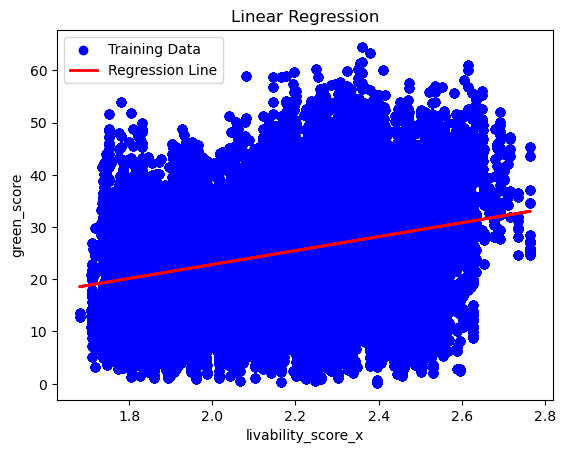

In [21]:
# Plot the training data and regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('livability_score_x')
plt.ylabel('green_score')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [22]:
rf_model = RandomForestRegressor()

In [23]:
rf_model.fit(X_train, y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_16580\223814155.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [24]:
y_pred_rf = rf_model.predict(X_test)

In [25]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Mean Squared Error:', mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest R-squared:', r2_rf)

Random Forest Mean Squared Error: 41.259165525992664
Random Forest R-squared: 0.6402972301839536


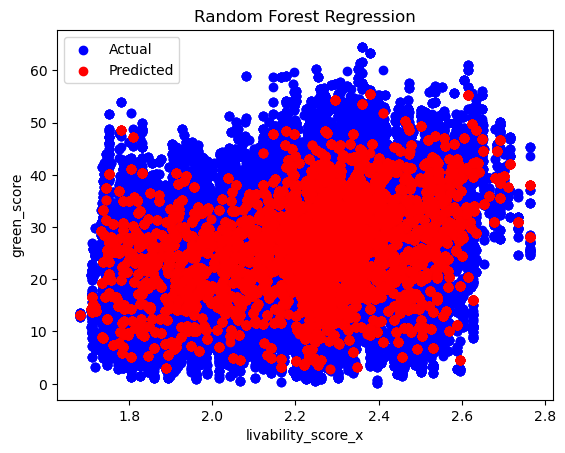

In [26]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_rf, color='red', label='Predicted')
plt.xlabel('livability_score_x')
plt.ylabel('green_score')
plt.title('Random Forest Regression')
plt.legend()
plt.show()